In [1]:
import opensmile
import os
import pandas as pd

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals
)
frames = []
for i in range(1,25):
    if(i<10): 
        directory = f'./archive/Actor_0{i}'
    else:
        directory = f'./archive/Actor_{i}'
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        if os.path.isfile(f):
            emotion = filename[7]
            strength = filename[10]
            gender = str(i%2)
            df = smile.process_file(f)
            df['Intensity'] = [strength]
            df['Gender'] = [gender]
            df['Emotion'] = [emotion]
            frames.append(df)
all_files = pd.concat(frames)
all_files.head()        

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,Intensity,Gender,Emotion
file,start,end,,,,,,,,,,,,,,,,,,,,,
./archive/Actor_01/03-01-06-02-01-01-01.wav,0 days,0 days 00:00:05.005000,35.420021,0.122371,31.292658,35.643230,39.118298,7.825640,35.614376,50.453491,41.440990,15.520784,...,1.803607,1.012146,0.302000,0.268805,0.553333,0.414796,-30.133526,2,1,6
./archive/Actor_01/03-01-01-01-02-02-01.wav,0 days,0 days 00:00:03.169833333,24.268759,0.096042,22.443830,24.478970,26.744179,4.300348,159.004990,128.233856,31.331644,10.120677,...,2.222222,0.977199,0.333333,0.267374,0.500000,0.445702,-46.193146,1,1,1
./archive/Actor_01/03-01-08-01-01-02-01.wav,0 days,0 days 00:00:03.269916667,25.457859,0.136773,23.199665,26.253952,27.889557,4.689892,87.123085,60.638626,62.534744,37.327133,...,2.461539,1.250000,0.252500,0.190968,0.522500,0.487615,-44.779564,1,1,8
./archive/Actor_01/03-01-02-01-02-01-01.wav,0 days,0 days 00:00:03.503499999,24.561493,0.271241,22.148478,23.513922,25.099932,2.951454,525.562256,365.437317,31.187920,19.770306,...,2.292264,1.453488,0.250000,0.194010,0.414000,0.446166,-47.324703,1,1,2
./archive/Actor_01/03-01-04-02-02-02-01.wav,0 days,0 days 00:00:03.737062500,28.032852,0.094122,26.030704,27.853386,30.345825,4.315121,151.693970,90.360168,82.783180,162.796143,...,2.150538,0.817439,0.486667,0.309121,0.535000,0.445225,-40.185699,2,1,4


In [13]:
import plotly.express as px

fig = px.scatter(all_files,x='F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',y='spectralFluxV_sma3nz_amean',color='Emotion')
fig.show()
print(all_files.shape)

(1440, 91)


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(random_state=0,max_depth=12)
X = all_files[all_files.columns[:90]]
y = all_files['Emotion']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=0)
dtc.fit(Xtrain,ytrain)

ypred =  dtc.predict(Xtest)
print(accuracy_score(ytest,ypred))

0.44166666666666665


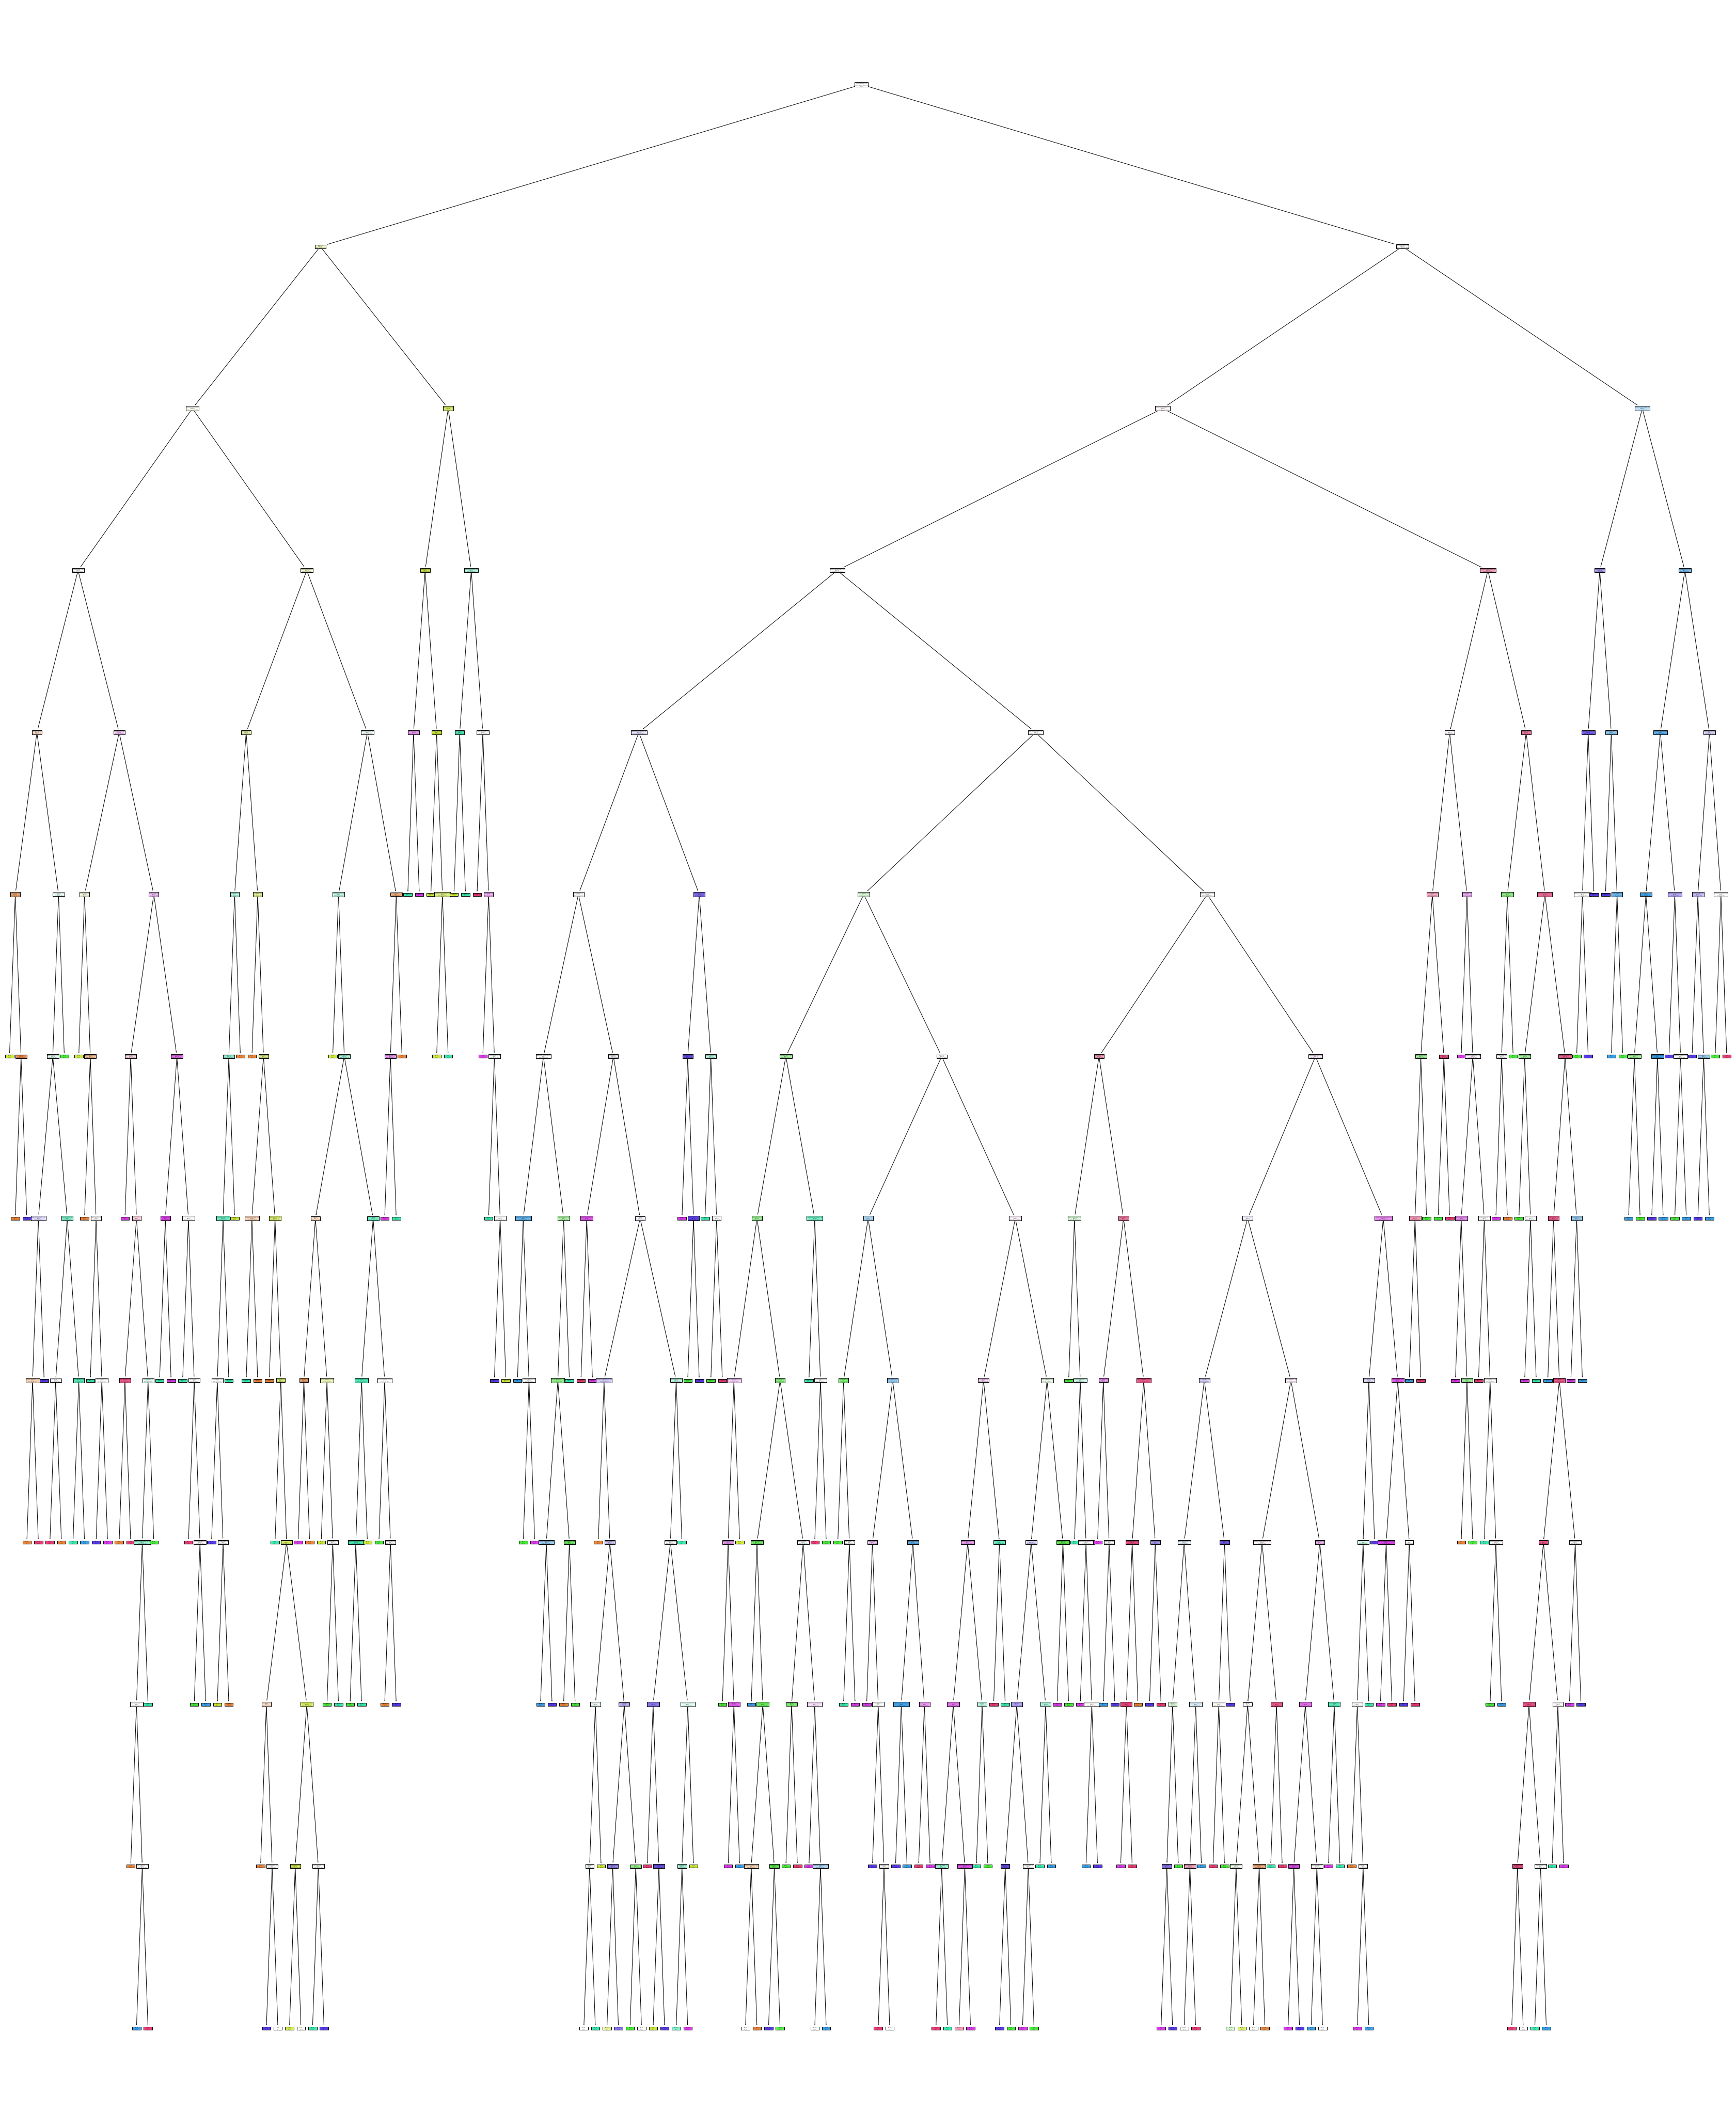

In [10]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(60,75))
_ = tree.plot_tree(dtc,feature_names=all_files.columns[:90],class_names=all_files['Emotion'],filled=True)
fig.savefig("tree.jpg")

In [11]:
text_repr = tree.export_text(dtc)
print(text_repr)

|--- feature_66 <= 0.12
|   |--- feature_88 <= 1.50
|   |   |--- feature_33 <= 0.72
|   |   |   |--- feature_35 <= 0.70
|   |   |   |   |--- feature_30 <= 0.02
|   |   |   |   |   |--- feature_27 <= 1.04
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_27 >  1.04
|   |   |   |   |   |   |--- feature_86 <= 0.48
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_86 >  0.48
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_30 >  0.02
|   |   |   |   |   |--- feature_84 <= 0.17
|   |   |   |   |   |   |--- feature_38 <= 24.77
|   |   |   |   |   |   |   |--- feature_45 <= -0.47
|   |   |   |   |   |   |   |   |--- feature_0 <= 36.75
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_0 >  36.75
|   |   |   |   |   |   |   |   |   |--- class: 8
|   |   |   |   |   |   |   |--- feature_45 >  -0.47
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_

In [12]:
importance = dtc.feature_importances_
f = px.bar(x=df.columns[0:90],y=importance)
f.show()

In [15]:
imp_dict = dict(zip(df.columns[0:90],importance))
imp_dict = dict(sorted(imp_dict.items(),key=lambda item: item[1],reverse=True))
print(imp_dict)

{'spectralFluxV_sma3nz_amean': 0.06965563354956796, 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2': 0.05156889504847249, 'loudness_sma3_meanFallingSlope': 0.04792662122823205, 'Intensity': 0.03418391135434437, 'jitterLocal_sma3nz_amean': 0.030612023264927714, 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0': 0.028928495353233347, 'F1amplitudeLogRelF0_sma3nz_amean': 0.02726992521191777, 'F2amplitudeLogRelF0_sma3nz_stddevNorm': 0.02345042102969873, 'mfcc3V_sma3nz_amean': 0.02269711114545352, 'mfcc2V_sma3nz_amean': 0.022312732763983448, 'shimmerLocaldB_sma3nz_stddevNorm': 0.022255597654156342, 'slopeV500-1500_sma3nz_stddevNorm': 0.021336398409880383, 'F3frequency_sma3nz_amean': 0.020337503679329988, 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm': 0.01993599232162993, 'mfcc2_sma3_stddevNorm': 0.019754650467654615, 'HNRdBACF_sma3nz_stddevNorm': 0.01928578872153267, 'VoicedSegmentsPerSec': 0.01894591883867681, 'logRelF0-H1-A3_sma3nz_amean': 0.018584816205543083, 'loudness_sma3_pctlrange0-2': 0.01848661548

In [19]:
feature_list = []
for i in range(30):
    feature_list.append(list(imp_dict.keys())[i])
print(feature_list)

['spectralFluxV_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2', 'loudness_sma3_meanFallingSlope', 'Intensity', 'jitterLocal_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0', 'F1amplitudeLogRelF0_sma3nz_amean', 'F2amplitudeLogRelF0_sma3nz_stddevNorm', 'mfcc3V_sma3nz_amean', 'mfcc2V_sma3nz_amean', 'shimmerLocaldB_sma3nz_stddevNorm', 'slopeV500-1500_sma3nz_stddevNorm', 'F3frequency_sma3nz_amean', 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm', 'mfcc2_sma3_stddevNorm', 'HNRdBACF_sma3nz_stddevNorm', 'VoicedSegmentsPerSec', 'logRelF0-H1-A3_sma3nz_amean', 'loudness_sma3_pctlrange0-2', 'mfcc4_sma3_stddevNorm', 'mfcc4_sma3_amean', 'StddevUnvoicedSegmentLength', 'alphaRatioV_sma3nz_stddevNorm', 'F3frequency_sma3nz_stddevNorm', 'MeanVoicedSegmentLengthSec', 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope', 'F0semitoneFrom27.5Hz_sma3nz_amean', 'hammarbergIndexV_sma3nz_stddevNorm', 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0', 'mfcc4V_sma3nz_amean']
